In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
import matplotlib.pyplot as plt

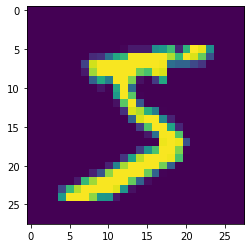

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
x_train, x_test = x_train / 255.0 , x_test / 255.0 #to squeeze the data between 0 to 1

In [ ]:
model = Sequential([
                    #Flatten is used for 2D arrays to make it 1D array. 
                    #whenever we have an image dataset, we need to use flatten first. 
                    #Input layer will have 784 neurons(pixels) here.
                    Flatten(input_shape=(28,28)), 
                    #Dense is used to create a hidden layer. First parameter will be number of neurons you want in hidden layer
                    Dense(256, activation = 'sigmoid'),
                    #Output layer should have 10 neurons
                    Dense(10, activation = 'softmax'), 
])

In [ ]:
import numpy as np
x = np.array([[1,2,3], [4,5,6]])
x.flatten() #flatten makes 2D arrays into 1D array

array([1, 2, 3, 4, 5, 6])

In [ ]:
tf.unique(y_train)

Unique(y=<tf.Tensor: shape=(10,), dtype=uint8, numpy=array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=uint8)>, idx=<tf.Tensor: shape=(60000,), dtype=int32, numpy=array([0, 1, 2, ..., 0, 7, 9], dtype=int32)>)

In [ ]:
model.summary() #summary is a method so () should be used. Every method should have () after its name :)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'sgd', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
              #logits is a function which will return the probabilities of each output neuron. Hence we need to set it as true
              metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs = 5, validation_data = (x_test, y_test)) #1875 because the machine itself divided the data into 1875 batches.

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 7s 3ms/step - loss: 0.5464 - accuracy: 0.8589 - val_loss: 0.3310 - val_accuracy: 0.9117
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3079 - accuracy: 0.9163 - val_loss: 0.2783 - val_accuracy: 0.9230
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2618 - accuracy: 0.9272 - val_loss: 0.2405 - val_accuracy: 0.9325
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2352 - accuracy: 0.9343 - val_loss: 0.2276 - val_accuracy: 0.9368
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2139 - accuracy: 0.9405 - val_loss: 0.2007 - val_accuracy: 0.9428


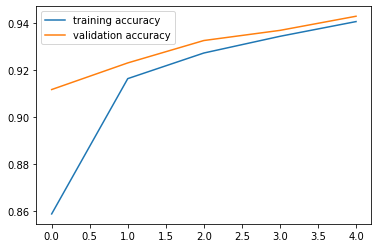

In [ ]:
plt.plot(model.history.history['accuracy'], label = 'training accuracy')
plt.plot(model.history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()

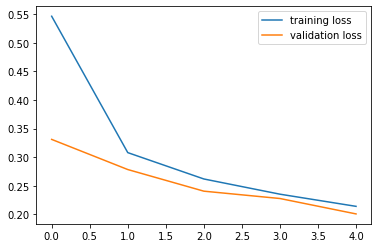

In [ ]:
plt.plot(model.history.history['loss'], label = 'training loss')
plt.plot(model.history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

In [ ]:
# Now if you want to test your model on a random image
import cv2
test_img = cv2.imread('handwrittendigit.jpg')

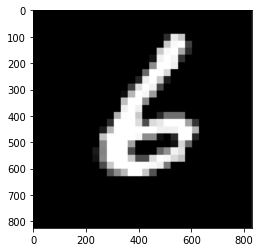

In [ ]:
plt.imshow(test_img)

In [ ]:
# the dimension of this image is not the same as images in the mnist dataset. So it will cause error on directly testing the image
# required dimension is (28,28)
test_img.shape

(825, 829, 3)

In [ ]:
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

In [ ]:
test_img.shape

(825, 829)

In [ ]:
test_img = cv2.resize(test_img, (28,28))

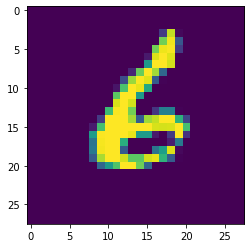

In [ ]:
plt.imshow(test_img)

In [ ]:
#test_img = test_img.flatten()

In [ ]:
test_img = np.reshape(test_img, (1,28,28)) #the dimension of training data was (no. of images, 28,28).
#so here it has to be (1,28,28)
model.predict(test_img)

array([[2.7825942e-04, 4.1258917e-04, 3.4118218e-03, 1.1836789e-04,
        1.3415942e-03, 1.7378101e-03, 9.9081248e-01, 3.0727836e-06,
        1.8117041e-03, 7.2341107e-05]], dtype=float32)

In [ ]:
np.argmax(model.predict(test_img)[0]) #this is how testing is performed on external image

6

In [ ]:
for arr in model.predict(x_test[:10]):
    print(np.argmax(arr)) #if we have to test for some images

7
2
1
0
4
1
4
9
6
9
